In [1]:
!pip install tensorflow==2.12.0
!pip install keras

In [49]:
import tensorflow as tf
import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [43]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [44]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
df.duplicated().sum()

0

In [52]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [54]:
geography_dummies = pd.get_dummies(df,columns = ["Geography","Gender"], drop_first=True)
geography_dummies = geography_dummies.astype(int)
df = geography_dummies
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [56]:
X = df.drop(columns = ["Exited"])
y = df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [57]:
X_train.shape

(8000, 11)

In [59]:
y_train.shape

(8000,)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
X_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [81]:
model = Sequential()
model.add(Dense(11,activation = "relu",input_dim = 11))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.8304 - accuracy: 0.4457 - val_loss: 0.5828 - val_accuracy: 0.7550
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5165 - accuracy: 0.7956 - val_loss: 0.4654 - val_accuracy: 0.8015
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.8083 - val_loss: 0.4273 - val_accuracy: 0.8150
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8199 - val_loss: 0.4092 - val_accuracy: 0.8220
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4094 - accuracy: 0.8288 - val_loss: 0.3966 - val_accuracy: 0.8290
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3975 - accuracy: 0.8361 - val_loss: 0.3861 - val_accuracy: 0.8365
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3869 - accuracy: 0.8414 - val_loss: 0.3757 - val_accuracy: 0.8470
Epoch 

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.layers[0].get_weights()

[array([[ 5.29131889e-02, -4.44636717e-02, -2.32163537e-03,
         -3.80839229e-01, -5.50139070e-01,  1.19188260e-02,
         -2.36532003e-01,  6.88138530e-02,  9.27417353e-02,
         -2.19514728e-01, -2.40894128e-02],
        [ 1.99756131e-01,  3.12920362e-01, -1.11645269e+00,
         -1.14453584e-01, -9.68433380e-01,  1.27559155e-02,
          1.66451037e-01,  1.31673992e-01, -1.17564070e+00,
          4.82735690e-03, -2.30045617e-02],
        [ 1.36683449e-01, -2.36403532e-02, -8.54885697e-01,
         -7.37607703e-02,  5.02649307e-01,  1.71894375e-02,
          2.38783896e-01, -8.41339082e-02,  1.36374623e-01,
         -1.54234037e-01,  3.71372588e-02],
        [-3.39277387e-01,  4.84097749e-01,  5.39597929e-01,
          1.44477069e-01,  3.53668958e-01,  2.21962690e-01,
         -1.16887406e-01, -2.26974621e-01, -2.37215281e-01,
         -3.00502330e-01,  2.48457879e-01],
        [ 2.09799558e-01,  7.37639129e-01, -1.63536951e-01,
         -5.36087155e-01, -1.98174700e-01,  

In [83]:
model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


array([[0.08888084],
       [0.08789605],
       [0.13580038],
       ...,
       [0.01962447],
       [0.08559017],
       [0.3146417 ]], dtype=float32)

In [84]:
print(model.history.history.keys())


dict_keys([])


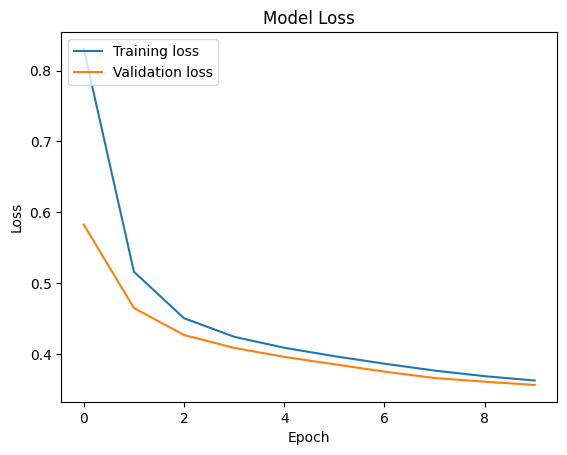

In [85]:
import matplotlib.pyplot as plt
if 'loss' in history.history:
    plt.plot(history.history['loss'], label='Training loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()